 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd # pip instal1 pandas
import numpy as np
import datetime as dt
from pathlib import Path
import os 
import csv
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
file_path = Path('../Resources/whale_returns.csv')
whale_csv = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
                      

whale_csv.head(1060)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls

whale_csv = whale_csv.dropna().copy()
whale_csv
whale_csv.isnull().sum()
whale_csv.head(1060)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
file_path = Path('../Resources/algo_returns.csv')
algo_csv = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)                   
algo_csv.head(1241)



,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algo_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_csv = algo_csv.dropna().copy()
algo_csv
algo_csv.isnull().sum()
algo_csv.head(1241)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
file_path = Path('../Resources/sp500_history.csv')
sp500_csv = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)   

sp500_csv=sp500_csv.sort_index()

sp500_csv.head(1650)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [9]:
sp500_csv["Close"]=sp500_csv["Close"].str.replace("$","", regex=True)
sp500_csv["Close"]=sp500_csv["Close"].str.replace(",","")
sp500_csv["Close"]=sp500_csv["Close"].astype("float")
sp500_csv

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [10]:
# Calculate Daily Returns

returns = sp500_csv.pct_change()

print(returns)

               Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
...              ...
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841

[1649 rows x 1 columns]


In [11]:
# Drop nulls
returns = returns.dropna().copy()
returns
returns.isnull().sum()
returns.head(1649)
sp500_csv = returns

In [12]:
# Rename `Close` Column to be specific to this portfolio.

df = pd.DataFrame(sp500_csv)

df.rename(columns={"Close":"SP500"}, inplace=True)

df


,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
whale_csv.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'],
      dtype='object')

In [14]:
algo_csv.columns

Index(['Algo 1', 'Algo 2'], dtype='object')

In [15]:
sp500_csv.columns

Index(['SP500'], dtype='object')

## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
display(whale_csv)
display(algo_csv)
display(sp500_csv)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

df = combined_returns = pd.concat([whale_csv, algo_csv, sp500_csv] ,axis = "columns" ,join ="inner")


combined_returns.head()

    



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

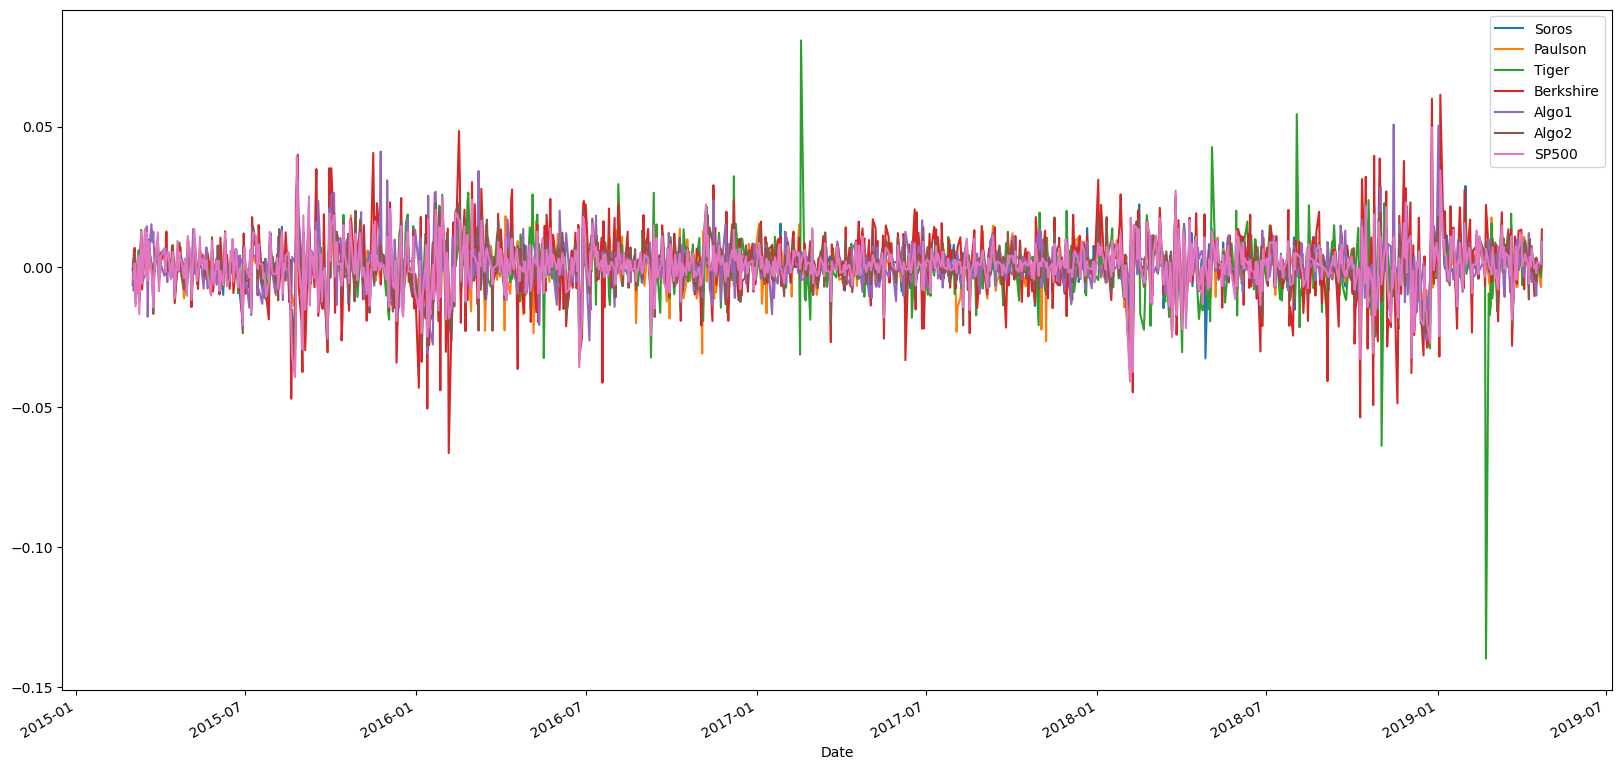

In [18]:
# Plot daily returns of all portfolios
daily_returns = combined_returns

combined_returns.columns = [ "Soros", "Paulson", "Tiger", "Berkshire", "Algo1", "Algo2", "SP500"]

combined_returns.plot(figsize = (20,10))





In [19]:
combined_returns.columns  

Index(['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo1', 'Algo2', 'SP500'], dtype='object')

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

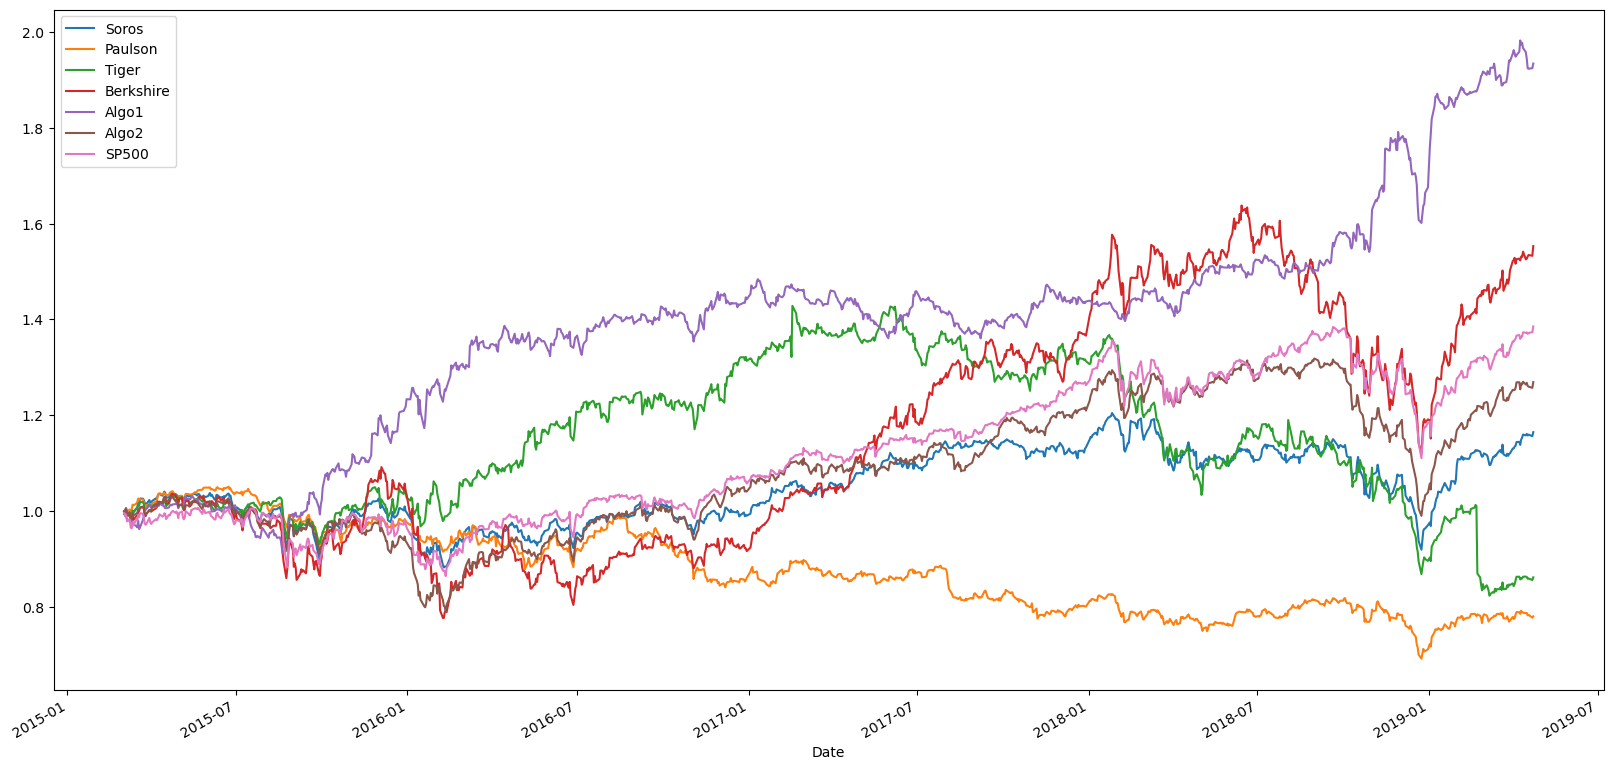

In [20]:
# Calculate cumulative returns of all portfolios
df_cum = (1+ combined_returns).cumprod()

# Plot cumulative returns
df_cum.plot(figsize = (20,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

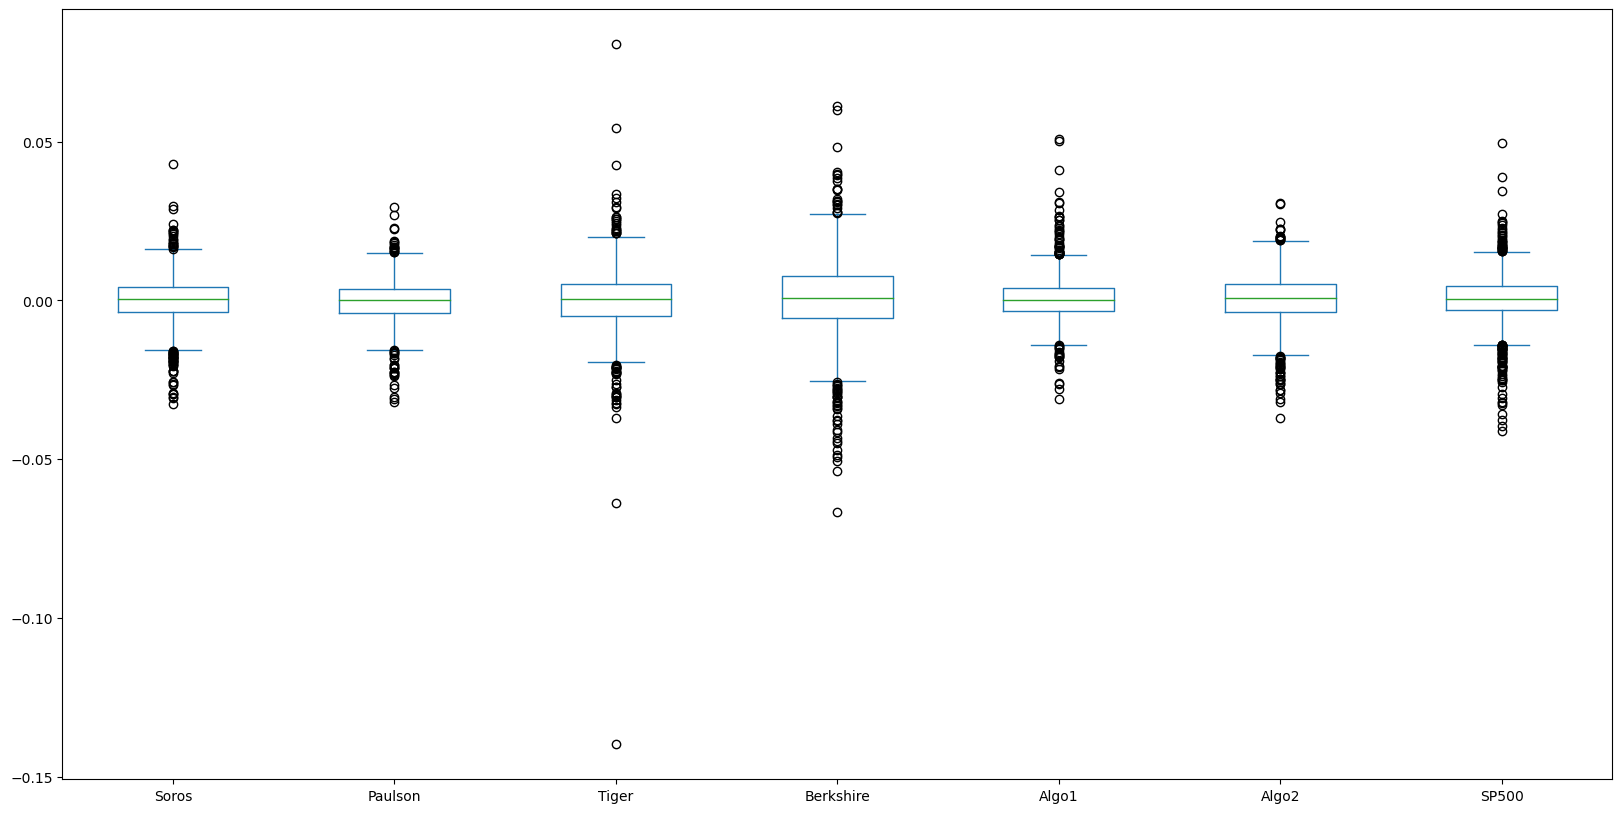

In [21]:
# Box plot to visually show risk
combined_returns.plot(kind = "box", figsize =(20,10))

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
combined_returns_std = pd.DataFrame(combined_returns.std()).rename(columns = {0:"std"})
combined_returns_std

,std
Soros,0.007895
Paulson,0.007023
Tiger,0.010894
Berkshire,0.012919
Algo1,0.007620
Algo2,0.008342
SP500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [23]:
# Calculate  the daily standard deviation of S&P 500
sp500_csv_std = pd.DataFrame(sp500_csv.std()).rename(columns = {0:"std"})
sp500_csv_std
# Determine which portfolios are riskier than the S&P 500
riskier_std = combined_returns_std[combined_returns_std["std"] > combined_returns_std.loc["SP500", "std"]]
riskier_std                                  
                                  

,std
Tiger,0.010894
Berkshire,0.012919


### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns_std*np.sqrt(252)
annualized_std

,std
Soros,0.125335
Paulson,0.111488
Tiger,0.172936
Berkshire,0.205077
Algo1,0.120967
Algo2,0.132430
SP500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

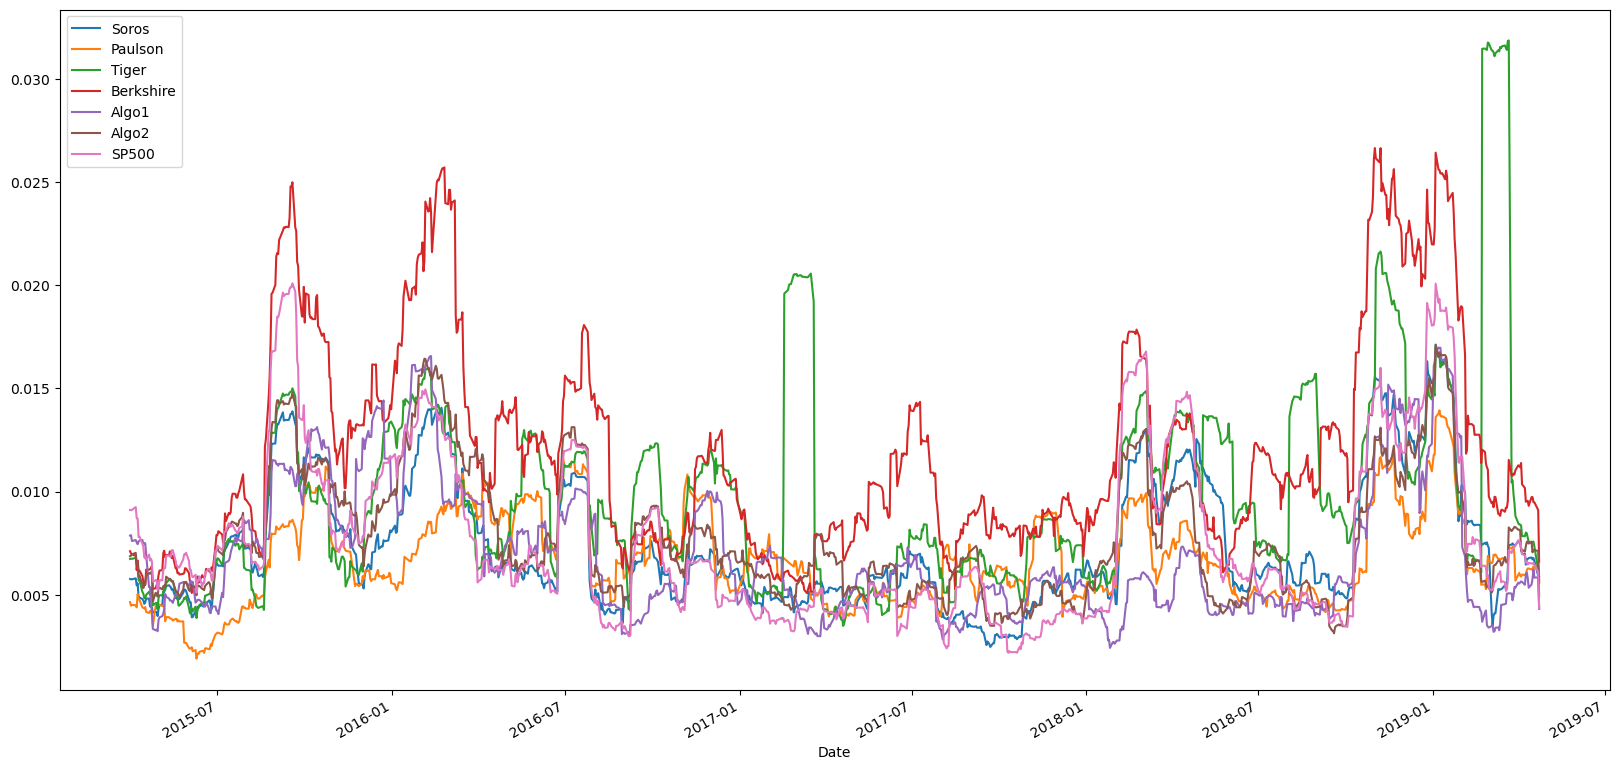

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21 = combined_returns[["Soros", "Paulson", "Tiger", "Berkshire", "Algo1", "Algo2", "SP500"]].rolling(window = 21).std()
rolling_21
# Plot the rolling standard deviation
rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

In [26]:
# Calculate the correlation
correlation = pd.DataFrame(combined_returns.corr())

# Display de correlation matrix
correlation


,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,SP500
Soros,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
Paulson,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
Tiger,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
Berkshire,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [27]:
# Calculate covariance of a single portfolio
whale_csv_covariance = combined_returns["Soros"].cov(combined_returns["SP500"])

whale_csv_covariance

5.658503197203612e-05

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [28]:

# Calculate variance of S&P 500
variance = combined_returns["SP500"].var()
variance 





7.316632424648712e-05

In [29]:
# Computing beta
whale_beta = whale_csv_covariance / variance
print(whale_beta)

0.7733753547794618


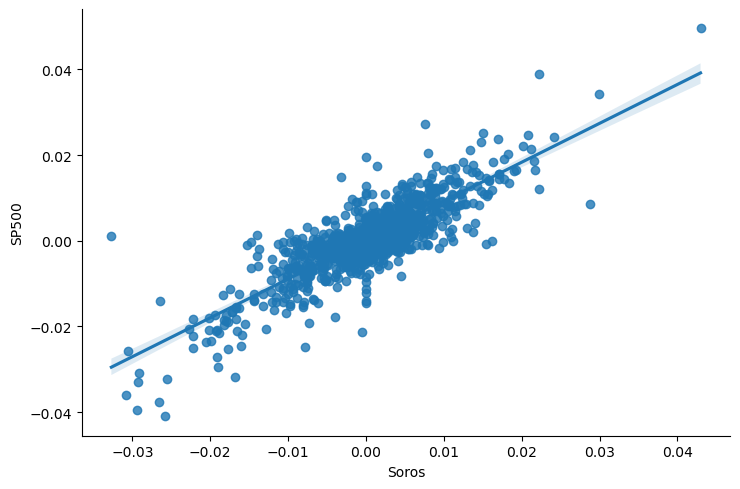

In [30]:

# Plot beta trend
import seaborn as sns   
sns.lmplot (x="Soros", y="SP500", data=combined_returns, aspect =1.5, fit_reg=True)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
noncorrelated_combined_returns = combined_returns

sharpe_ratios = (noncorrelated_combined_returns.mean() * 252) / noncorrelated_combined_returns.std() * np.sqrt(252)
sharpe_ratios


Soros         89.817051
Paulson     -121.859610
Tiger        -30.507024
Berkshire    156.696151
Algo1        347.419418
Algo2        126.343642
SP500        163.363399
dtype: float64

<Axes: >

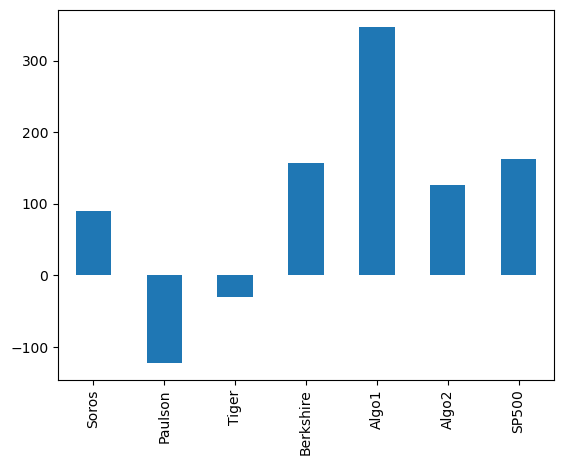

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Overall the Algorithmic outpreformed the Whales and S&P 500. 
if you look at the stocks in Algorithmic indiviually, Algorithmic 1 outpreformed all stocks and Algo 2 did not outperform Berkshire or SP500 but the mean of both stocks in Algorithmic did. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [33]:
# Import Libraires
import pandas as pd 
import numpy as np
import datetime as dt
from pathlib import Path
import os 
import csv
%matplotlib inline

In [34]:
# Reading data from 1st stock
file_path = Path('../Resources/aapl_historical.csv')
apple_csv = pd.read_csv(file_path, index_col= "Trade DATE", infer_datetime_format=True, parse_dates=True)                   
apple_csv.rename(columns = {"NOCP":"aapl"}, inplace= True)
apple_csv.drop("Symbol", inplace=True, axis=1)
apple_csv.head()




,aapl
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [35]:
# Reading data from 2nd stock
file_path = Path('../Resources/cost_historical.csv')
costco_csv = pd.read_csv(file_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True) 
costco_csv.rename(columns = {"NOCP":"cost"}, inplace = True)
costco_csv.drop("Symbol", inplace=True, axis=1)
costco_csv.head()

,cost
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [36]:
# Reading data from 3rd stock
file_path = Path('../Resources/goog_historical.csv')
google_csv = pd.read_csv(file_path, index_col= "Trade DATE", infer_datetime_format=True, parse_dates=True) 
google_csv.rename(columns = {"NOCP":"goog"}, inplace = True)
google_csv.drop("Symbol", inplace=True, axis=1)

google_csv.head()

,goog
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [37]:
# Combine all stocks in a single DataFrame
combined_df = pd.DataFrame({'x': [ 'Date', 'goog','aapl', 'cost'], 'y': [1, 2, 3, 4]})
combined_df = combined_returns = pd.concat([google_csv, apple_csv, costco_csv] ,axis = "columns" ,join ="inner")

combined_df = combined_df.select_dtypes(exclude=['object'])
combined_df.index.names = ['Date']
combined_df



,goog,aapl,cost
Date,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [38]:
# Reset Date index
combined_df.sort_index(ascending = True, inplace = True)

combined_df.index.names = ['Date']
print(combined_df.columns) 

combined_df

Index(['goog', 'aapl', 'cost'], dtype='object')


,goog,aapl,cost
Date,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


In [39]:
# Calculate daily returns
combined_df = combined_df.pct_change()
# Drop NAs
combined_df.dropna(inplace = True)
# Display sample data
combined_df.head()

,goog,aapl,cost
Date,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Set weights
weights = [1/3, 1/3, 1/3]
my_portfolio = combined_df.dot(weights)
# Calculate portfolio return
portfolio = pd.DataFrame(my_portfolio)

# Display sample data
portfolio.head()

,0
Date,
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595
2018-05-18,-0.006061


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
# Joining all the csv stocks 

combined_pt = pd.concat([my_portfolio, whale_csv, algo_csv, sp500_csv], axis='columns', join='inner')
combined_pt.rename(columns= {0: "Mine"},inplace = True )
combined_pt.dropna(inplace=True)
combined_pt.sort_index()
combined_pt.head()



,Mine,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized `std`

portfolio.std()
annualized_variance = (combined_pt.var()*252)
annualized_std = np.sqrt(annualized_variance)
annualized_std

Mine                           0.211496
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP500                          0.152054
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [43]:
# Calculate rolling standard deviation
combined_pt.rolling(window=21).std()
combined_pt


,Mine,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


<Axes: xlabel='Date'>

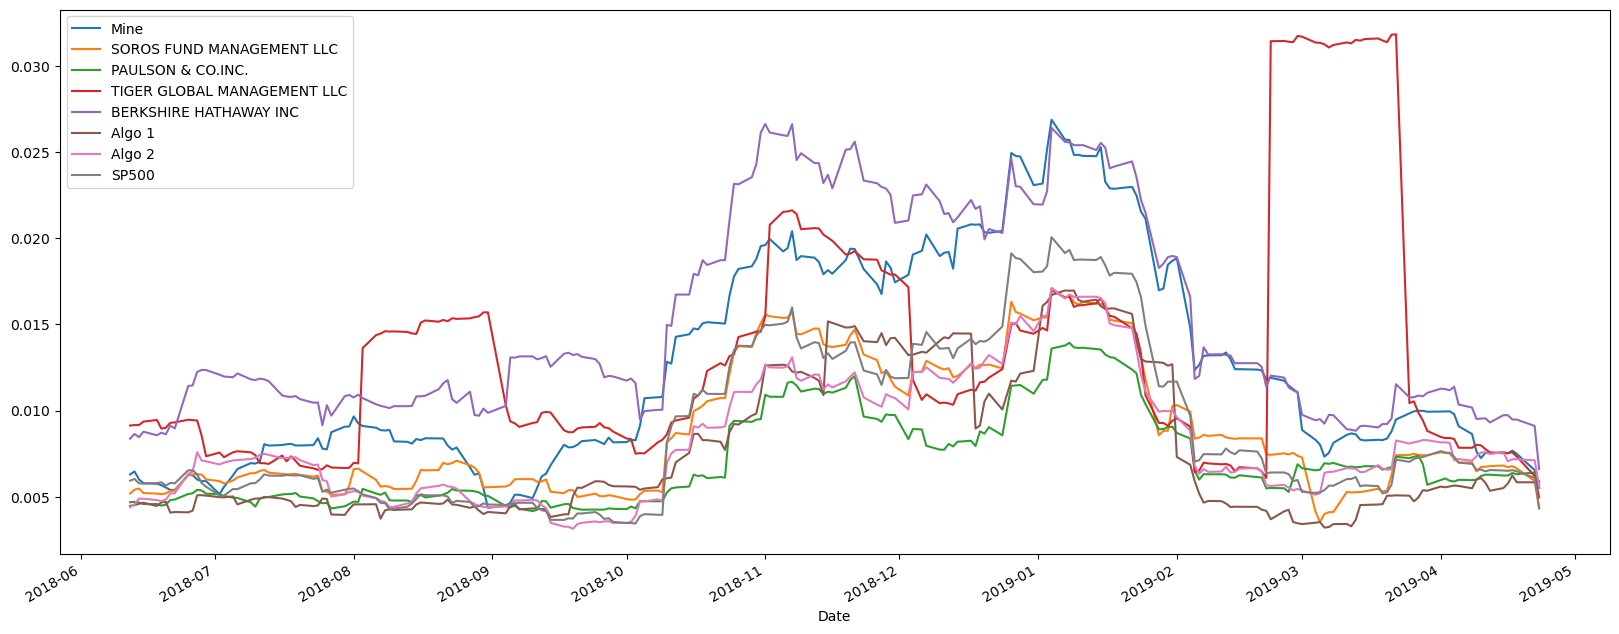

In [44]:
# Plot rolling standard deviation
combined_pt.rolling(window=21).std().plot(figsize=(20,8))

### Calculate and plot the correlation

In [45]:
# Calculate and plot the correlation
correlation = pd.DataFrame(combined_pt.corr())
correlation

,Mine,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Mine,1.000000,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875
SOROS FUND MANAGEMENT LLC,0.733250,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.644210,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.391972,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.801158,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.261471,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.739936,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
SP500,0.871875,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


<Axes: >

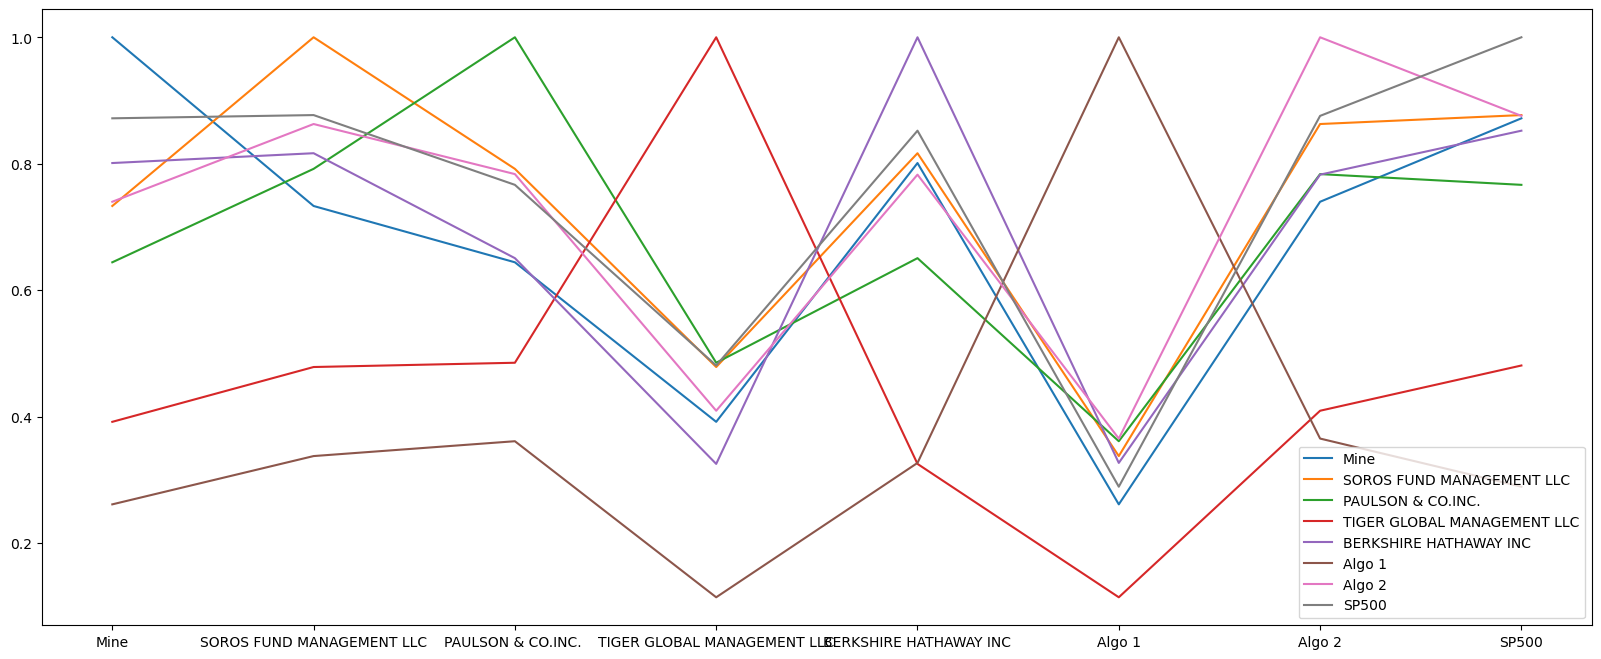

In [46]:
correlation.plot(figsize=(20,8))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Beta'}, xlabel='Date'>

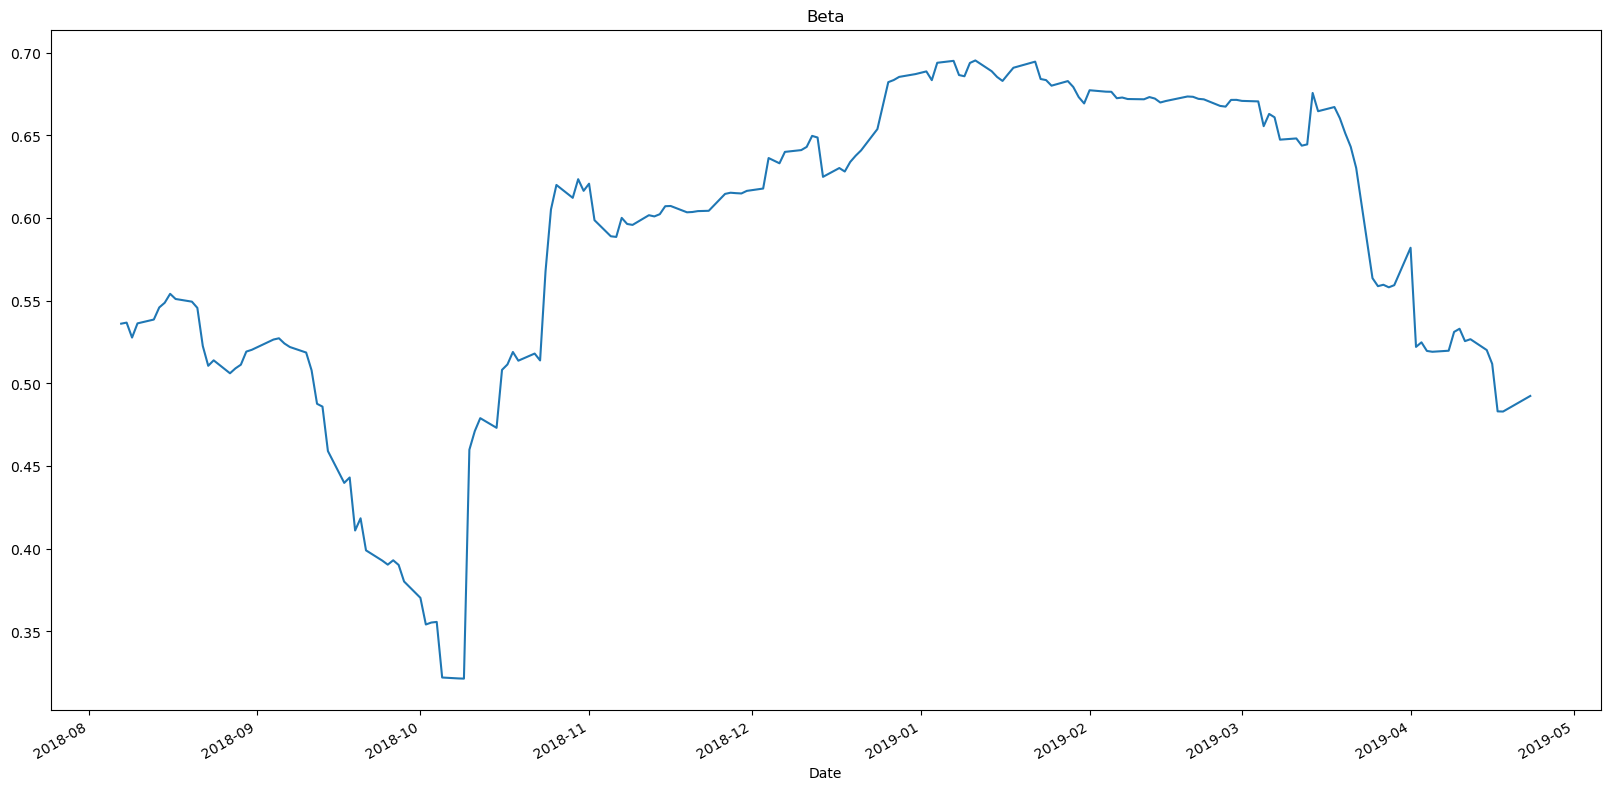

In [50]:
# Calculate and plot Beta
rolling = combined_pt['Mine'].rolling(window=60).var()
rolling_covariance = combined_pt['Mine'].rolling(window=60).cov(combined_pt['SP500'])
rolling_beta = rolling_covariance / rolling
rolling_beta.plot(figsize=(20, 10), title='Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [66]:
# Calculate Annualized Sharpe Ratios

trading_days = combined_pt.count()

sharpe_ratios = combined_pt.mean() * trading_days/combined_pt.std() * np.sqrt(trading_days)
sharpe_ratios


Mine                           214.467253
SOROS FUND MANAGEMENT LLC       98.994372
PAULSON & CO.INC.               59.467842
TIGER GLOBAL MANAGEMENT LLC   -237.702431
BERKSHIRE HATHAWAY INC          36.717984
Algo 1                         467.873623
Algo 2                          18.526625
SP500                          134.413961
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

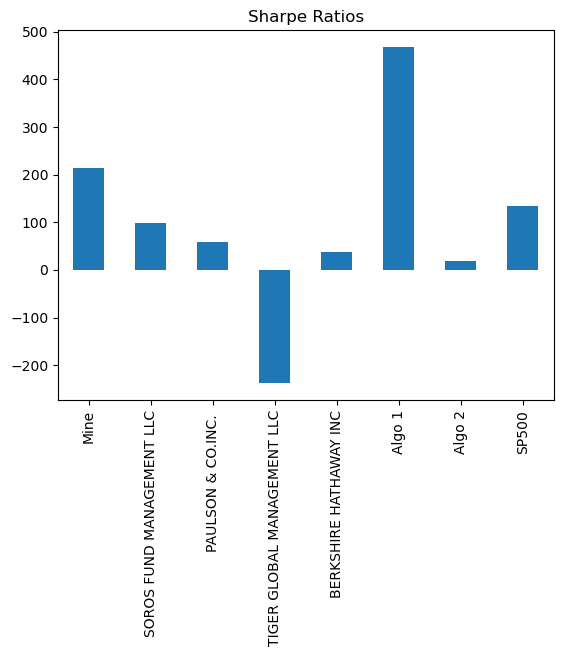

In [67]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?
 My portfolio is performing pretty well compared to the others. Algo is 1 is preforming best and Tiger is performing worst.  